## **Решаем задачу регрессии прогнозируем цены на недвижимость в Бостоне **

**1. Возьмем все признаки из датасета с урока**

In [ ]:
# Памятка:
# регресссия -(обьем продаж, цена)
# регресссия - прогнозирование цены товара (цена изменяется в заданном интервале)
# конверсия - кликнет на баннер пользователь или нет (событие -что то сделал или не сделал), дискретная величина
# таргет (беглая шкала оценок от 1 до 10) вино; 
# классификация (набор дискретных значений);
# регрессия (числовое ранжирование, усредненное значение баллов 4,6 округляем до 5)

In [ ]:
# импортуируем нужные нам библиоткеи
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [ ]:
# загружаем данные
# загружаем датасет из sklearn load_boston

import pandas as pd
from sklearn.datasets import load_boston

boston_data = load_boston()

X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)  # переводим в ДатаФрейм
y = boston_data.target

X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# разделяем датасет на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state=42)  
# обучающая выборка train  и тестовая test  
# shuffle  - перемешать данные True. Данные должны быть не связвны со временем(год и месяц перемешивать нельзя)
#  random_state=42) зафиксировать результат

**3. Применяем модель Random Forest.**

In [ ]:
# Рекурсия - он параллельно создает несколько деревьев (рондомизирует набор фич: первое дерево из трех фич состоящее, второе из пяти фич, третье из семи, четвертое из 10 фич состоящее)
# метод используе не всю выборку, а использует отдельные блоки)
# каждое дерево предсказывает свой уникальный результат, дплее происходит голосование, если классофикация, то приненяется часто встречаемый ответ; если регрессия то происходит усреднение (выход: одно значение)

In [ ]:
#  импортируем модель Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)  # обучаем нужную модель

model.fit(X_train, y_train)                       # метод Fit запускает алгоритм

RandomForestRegressor(random_state=42)

In [ ]:
# сделаем предсказания зависимой переменной y на тестовом и обучающем наборе
y_train_pred = model.predict(X_train)   # делаем придикт по обучающей модели 
y_test_pred = model.predict(X_test)     # делаем придикт по тестовой модели 

**3. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.**


Основные метрики оценки качества регрессии

Средняя абсолютная ошибка (MAE) - показывает среднюю абсолютную разность между целевыми значениями и прогнозом. Чем выше это значение, тем хуже модель.

Средняя квадратическая ошибка (MSE) - показывает среднеквадратичную разность между целевыми значениями и прогнозом. Чем выше это значение, тем хуже модель.

Коэффициент детерминации (R^2) - показывает насколько наше целевое значение зависит от выбранных признаков. Чем ближе к 1 тем лучше модель.


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

# выведем метрики  качества на тестовом и обучающем множестве
print('Train MAE {}'.format(mae(y_train, y_train_pred)))   # на выходе факт обучающей модели тренировочной и предсказанной цены модели, сравниваем и  поодсчитываем выборку
print('Test MAE {}'.format(mae(y_test, y_test_pred)))      # на выходе факт тестовой модели тестовой и предсказанной цены модели на недвижимость, сравниваем и  поодсчитываем выборку

# Вывод: на тренинговой модели норм, а на тестовой в два раза увеличилась Средняя абсолютная ошибка (MAE)

Train MAE 0.903477722772276
Test MAE 2.0395392156862746


In [ ]:
print('Train MSE  {}'.format(mse(y_train, y_train_pred)))
print('Test MSE  {}'.format(mse(y_test, y_test_pred)))

# Вывод: при средней квадратической ошибки (MSE): на тренинговой модели два, а на тестовой восесь, произошло увеличилиение..

Train MSE  1.9783925024752465
Test MSE  7.901513892156864


In [ ]:
print('Train R^2 {}'.format(r2(y_train, y_train_pred)))
print('Test R^2 {}'.format(r2(y_test, y_test_pred)))

# Вывод: Коэффициент детерминации (R^2)  для регрессии: на трейне 0.97 и на тесте 0.88, разница в 0.10, что достаточно высоко 

# Значит модель переобучаем!!!....

Train R^2 0.9772267182453291
Test R^2 0.8922527442109116


**4. Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.**


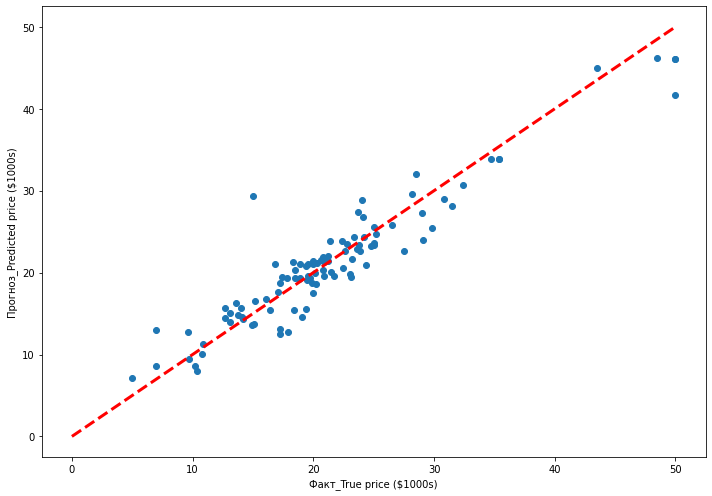

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred)
plt.plot([0, 50], [0, 50], '--k', color='red', linewidth=3)
plt.xlabel('Факт_True price ($1000s)')
plt.ylabel('Прогноз_Predicted price ($1000s)')
plt.tight_layout()

### Вывод: поскольку R2 на тестовом наборе сильно меньше R2 на обучающем наборе, то модель сильно переобучилась на обучающем наборе.
### На тестовом картина довольно хорошая - Test R^2 0.8922527442109116,
### однако это условие будет не соблюдаться, где то будет 0.88, а где-то 0.6

**4. Сравнить показатели качества новой модели с моделью с урока и сделать вывод**

#Вывод: в нашем примере модель сильно переобучилась, по сравнению с моделью с урока, которая не переобучилась и не дообучилась.(оптимальный случай, для средней ошибки нет, а для среднеквадратической ошибки ближе к 0.7 модель приемлема)

**5. Дальнейший разбор**

 В методе случайного леса, деревья вниз могут расти многоветково, нужно ограничить их рост

In [ ]:
# можно и sklearn пользоваться, но мы создаем функцию и 
# пробуем настроить гиперпараметры

def fit_predict(train, test, y_train, y_test, criterion = 'mse', n_estimators = 100, max_depth = None, min_samples_split = 2):  # критерий 'mse' среднеквадратическая ошибка 
  rf = RandomForestRegressor(criterion = criterion, n_estimators = n_estimators, max_depth = max_depth)
  rf.fit(train, y_train)
  y_pred_train = rf.predict(train)
  y_pred = rf.predict(test)
  print('train', r2(y_train, y_pred_train), 'test', r2(y_test, y_pred))
  
  # и фиксируем показатели..

In [ ]:
# пытаемся изменить максимальную глубину деревьев

for max_depth in range(2,21):          # range(2,21): глубина деревьев....
  print('R^2 score using max_depth = {0}:'.format(max_depth), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth = max_depth)

  # train 0.8693337271216253 test 0.8174842140681421 самый оптимальный вариант
  # R^2 score using max_depth = 3: максимальная глубина должна быть ближе к трем

R^2 score using max_depth = 2: train 0.7602123804236137 test 0.7065677453033665
R^2 score using max_depth = 3: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8715417587029507 test 0.8334718923725501
R^2 score using max_depth = 4: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9138155064537873 test 0.8648945707600387
R^2 score using max_depth = 5: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9331446384045268 test 0.8637017502736521
R^2 score using max_depth = 6: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9517264723538112 test 0.8983518981078888
R^2 score using max_depth = 7: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9599659017844028 test 0.8806837697578055
R^2 score using max_depth = 8: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9684213629096068 test 0.8754234469549478
R^2 score using max_depth = 9: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9700800517960564 test 0.8744214177056787
R^2 score using max_depth = 10: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9757150676531849 test 0.8786329621054716
R^2 score using max_depth = 11: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9752279819711392 test 0.8817543107738997
R^2 score using max_depth = 12: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9773775053943812 test 0.883523286894782
R^2 score using max_depth = 13: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9792390099404152 test 0.8908553385568425
R^2 score using max_depth = 14: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.974275516752568 test 0.8675886318994656
R^2 score using max_depth = 15: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9763358433412322 test 0.8749284408882914
R^2 score using max_depth = 16: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.977384603472163 test 0.8780154441216382
R^2 score using max_depth = 17: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9791121566849944 test 0.8918266563937035
R^2 score using max_depth = 18: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.978039488349134 test 0.8707713399348656
R^2 score using max_depth = 19: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9765364941826968 test 0.8847524035319584
R^2 score using max_depth = 20: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.9769415026728603 test 0.8716340947451249


In [ ]:
# минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
for min_samples_split in range(5,51,5):
  print('R^2 score using min_samples_leaf = {0}:'.format(min_samples_split), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_samples_split = min_samples_split)    # оптимальную глубины зафиксироавали - max_depth=3 - номер три 3

R^2 score using min_samples_leaf = 5: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8673871083447648 test 0.8241769856189819
R^2 score using min_samples_leaf = 10: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8693211210216436 test 0.833238681041662
R^2 score using min_samples_leaf = 15: train 0.8716967123647056 test 0.8199752159104211
R^2 score using min_samples_leaf = 20: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8687520339757477 test 0.8194095299335904
R^2 score using min_samples_leaf = 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8686725264701698 test 0.8224521856738424
R^2 score using min_samples_leaf = 30: train 0.8664485478709673 test 0.8196039573588444
R^2 score using min_samples_leaf = 35: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8716018146336346 test 0.8226662289541868
R^2 score using min_samples_leaf = 40: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8662483030569534 test 0.8109435162778931
R^2 score using min_samples_leaf = 45: train 0.8712950034499525 test 0.8243805027616201
R^2 score using min_samples_leaf = 50: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8699505406750486 test 0.8218062570550011


In [ ]:
# пробуем еще, нужно для того, чтобы узел дерева мог расщепиться
# train 0.9749604997691613 test 0.8802062670944227
# R^2 score using max_depth = 15: 

for criterion in ['mse','mae']:
  print('R^2 score using {0} criterion:'.format(criterion), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_samples_split = 15, criterion = criterion)           # оптимальную глубины зафиксироавали - max_depth=3 - номер 15

R^2 score using mse criterion: train 0.8660143294110112 test 0.8208532926827399
R^2 score using mae criterion: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:399: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


train 0.8382357299257838 test 0.7971451059104073


In [ ]:
# Замена числа «деревьев» в «случайном лесу».
for n_estimators in range(100,1001,100):      # число «деревьев» в «случайном лесу» заменили на 100 (сто)
  print('R^2 score using n_estimators = {0}:'.format(n_estimators), end = ' ')                      # фиксированные параметры - end = ' '
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_samples_split = 15, criterion = 'mse', n_estimators = n_estimators)

R^2 score using n_estimators = 100: train 0.8677520250089737 test 0.8124986939751083
R^2 score using n_estimators = 200: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8709482983883752 test 0.8247990148191344
R^2 score using n_estimators = 300: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8664422356612924 test 0.8242316132599159
R^2 score using n_estimators = 400: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8675980784077234 test 0.8188859712833452
R^2 score using n_estimators = 500: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8694384990621623 test 0.8246780936811388
R^2 score using n_estimators = 600: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8705163540186318 test 0.8263561624141107
R^2 score using n_estimators = 700: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8700921050871427 test 0.8224273663671694
R^2 score using n_estimators = 800: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8699215038394303 test 0.8274437024446355
R^2 score using n_estimators = 900: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8698206889779656 test 0.8247779889091365
R^2 score using n_estimators = 1000: 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


train 0.8699878913275398 test 0.8229064030362585


In [ ]:
# рассматриваем другие гипперпараметры

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(criterion = 'mse', n_estimators = 300, max_depth = 3, random_state = 5,  min_samples_split=15)

model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=3, min_samples_split=15,
                      n_estimators=300, random_state=5)

In [ ]:
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [ ]:
print('Train R^2 {}'.format(r2(y_train, y_train_pred2)))
print('Test R^2 {}'.format(r2(y_test, y_test_pred2)))

Train R^2 0.8685861956584837
Test R^2 0.8248676153984816


#Вывод: на выходе получается, при рассмотрении других гиперпараметров позволяет снизить ситуацию переобученя:
# на обучении 0.87, а на тестовом 0.82 намнго ближе, чем в ранее расчитанной нашей модели (вышеописанный случай) 
# Метрика близко находятся друг от друга, что считается наилучшим результатом, модель себя предсказуемо ведет ка на обучении (трейне) и на тесте, модель будет работать стабильней..

### Спасибо за внимание !